First zero index for y_f: 4363
First zero index for y_g: 693
First zero value for f(x): 1.0
First zero value for g(x):: 1.311396630843566


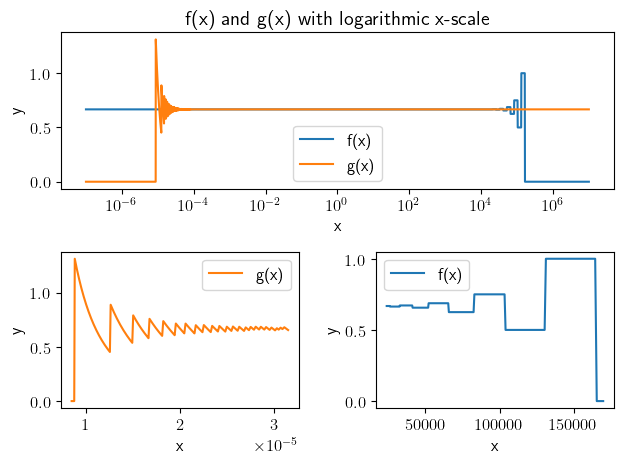

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# LaTeX in axis-labels
matplotlib.rcParams.update({'font.size': 12, 'text.usetex': True})

def f(x):
    return (x**3 + 1/3) - (x**3 - 1/3)

def g(x):
    return ((3 + 1/3*x**3) - (3 - 1/3*x**3))/x**3

f_ana = g_ana = 2/3

x = np.logspace(-7, 7, 5000)
x_32 = np.logspace(1e-1, 1e2, 1000, dtype='float32')
x_64 = np.logspace(1e-1, 1e2, 1000, dtype='float64')

# Calculate y values for f(x) and g(x)
y_f = f(x)
y_g = g(x)

# Get the indices, where the function values are zero
f_zeroes = np.argwhere(np.isclose(y_f, 0, atol=1e-6))
g_zeroes = np.argwhere(np.isclose(y_g, 0, atol=1e-6))

# Print the index closest to a non-zero function value
f_zero = np.min(f_zeroes)
g_zero = np.max(g_zeroes)
print("First zero index for y_f:", f_zero)
print("First zero index for y_g:", g_zero)
print("First zero value for f(x):", y_f[f_zero - 1])
print("First zero value for g(x)::", y_g[g_zero + 1])

# Create a 2x2 grid of subplots
fig, axs = plt.subplot_mosaic('AA;BC')

# Create a plot that spans both columns
ax1 = axs['A']
ax1.set_xscale("log")

# Plot f(x) and g(x)
ax1.plot(x, y_f, label="f(x)")
ax1.plot(x, y_g, label="g(x)")

# Add labels and legend
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
ax1.set_title("f(x) and g(x) with logarithmic x-scale")

# Create placeholders for the other two plots (commented sections)
ax2 = axs['B']
ax3 = axs['C']

offset_g = 200
ax2.plot(x[g_zero - 5:g_zero + offset_g], y_g[g_zero - 5:g_zero + offset_g], label="g(x)", color='tab:orange')

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.legend()

offset_f = 300
ax3.plot(x[f_zero - offset_f:f_zero + 5], y_f[f_zero - offset_f:f_zero + 5], label="f(x)")

ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.legend()

# Show the plot
plt.tight_layout()
plt.show()

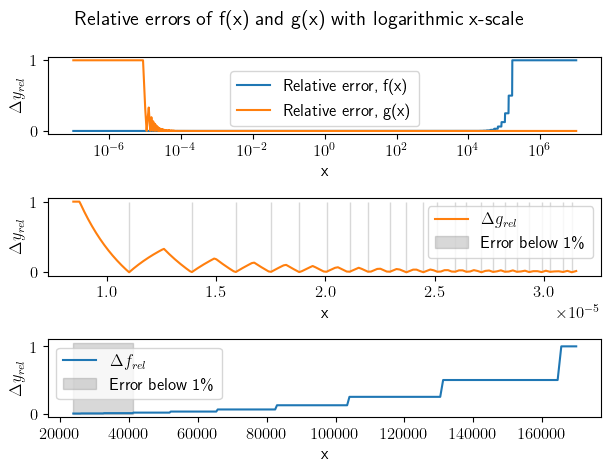

In [102]:
from matplotlib.ticker import FuncFormatter

plt.close()

# Calulate the relative error
f_rel = abs(y_f - f_ana) / f_ana
g_rel = abs(y_g - g_ana) / g_ana

# Create a plot with a logarithmic x-scale
fig2, axs2 = plt.subplot_mosaic('AA;BB;CC')
ax1 = axs2['A']
ax1.set_xscale("log")

# Plot f(x) and g(x)
ax1.plot(x, f_rel, label="Relative error, f(x)")
ax1.plot(x, g_rel, label="Relative error, g(x)")

# Add labels and legend
ax1.set_xlabel("x")
ax1.set_ylabel("$\Delta y_{rel}$")
ax1.legend()
fig2.suptitle("Relative errors of f(x) and g(x) with logarithmic x-scale")

# Create placeholders for the other two plots (commented sections)
ax2 = axs2['B']
ax3 = axs2['C']

offset_g = 200
lower_g = g_zero - 5
upper_g = g_zero + offset_g
ax2.plot(x[lower_g:upper_g], g_rel[lower_g:upper_g], label="$\Delta g_{rel}$", color='tab:orange')
ax2.fill_between(x[lower_g:upper_g], 0, ax3.get_ylim()[1], where=g_rel[lower_g:upper_g] < 0.01, label="Error below 1\%", color='gray', alpha=0.3)

ax2.set_xlabel("x")
ax2.set_ylabel("$\Delta y_{rel}$")
ax2.legend()

offset_f = 300
lower_f = f_zero - offset_f
upper_f = f_zero + 5
ax3.plot(x[lower_f:upper_f], f_rel[lower_f:upper_f], label="$\Delta f_{rel}$")
ax3.fill_between(x[lower_f:upper_f], 0, ax3.get_ylim()[1], where=f_rel[lower_f:upper_f] < 0.01, label="Error below 1\%", color='gray', alpha=0.3)

ax3.set_xlabel("x")
ax3.set_ylabel("$\Delta y_{rel}$")
ax3.legend()


plt.tight_layout()
plt.show()
fig2.savefig('e1_rel.pdf')